### CNN Model Training

#### Imports

In [4]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### Load and Split Dataset
80% training, 20% validation

In [7]:
# Load and preprocess images
def load_image(image_name, label):
    image_path = tf.strings.join([image_folder, '/', image_name])
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [224, 224])  # Resize to match the input shape of the CNN
    image = image / 255.0  # Normalize pixel values to [0, 1]
    return image, label

# Create a TensorFlow dataset from a DataFrame
def create_tf_dataset(dataframe, image_folder, batch_size=32):
    image_names = dataframe['image'].values
    labels = dataframe['MEL'].values
    dataset = tf.data.Dataset.from_tensor_slices((image_names, labels))
    dataset = dataset.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.shuffle(buffer_size=1000).batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)
    return dataset

csv_path = '../preprocessed_dataset/ISIC_2019_Training_Balanced.csv'
image_folder = '../preprocessed_dataset'

# Load the CSV file
df = pd.read_csv(csv_path)
df['image'] = df['image'] + '.jpg'

# Split dataset into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

print(f"Training set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")

# Create TensorFlow datasets for training and validation
train_dataset = create_tf_dataset(train_df, image_folder)
val_dataset = create_tf_dataset(val_df, image_folder)

print("Dataset loaded and preprocessed.")

Training set size: 31117
Validation set size: 7780
Dataset loaded and preprocessed.


#### Preview Dataset

Previewing training dataset:


2025-04-17 21:24:27.479825: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype double and shape [31117]
	 [[{{node Placeholder/_1}}]]
2025-04-17 21:24:27.480208: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype double and shape [31117]
	 [[{{node Placeholder/_1}}]]
2025-04-17 21:24:27.491221: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


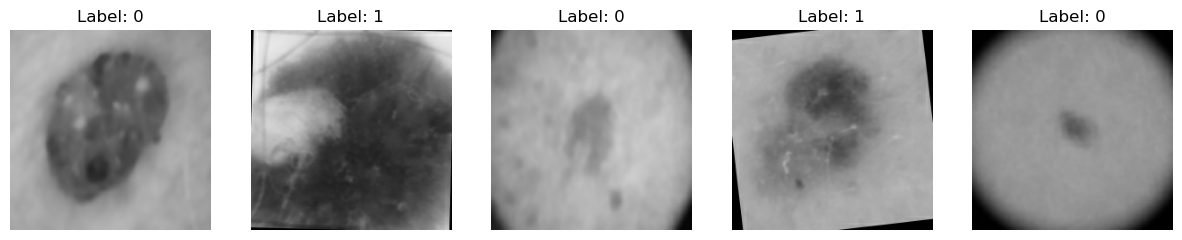

Previewing validation dataset:


2025-04-17 21:24:27.983438: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [7780]
	 [[{{node Placeholder/_0}}]]
2025-04-17 21:24:27.983616: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype double and shape [7780]
	 [[{{node Placeholder/_1}}]]


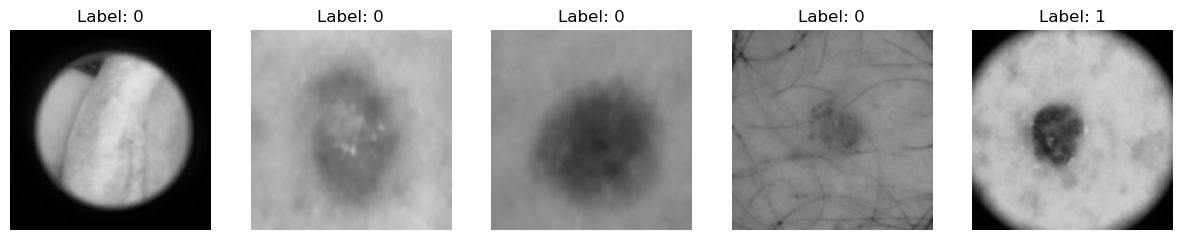

In [8]:
# Preview a batch of images and labels
def preview_dataset(dataset, num_images=5):
    for images, labels in dataset.take(1):  # Take one batch
        plt.figure(figsize=(15, 15))
        for i in range(num_images):
            ax = plt.subplot(1, num_images, i + 1)
            plt.imshow(images[i].numpy())
            plt.title(f"Label: {int(labels[i].numpy())}")
            plt.axis("off")
        plt.show()

# Preview the training dataset
print("Previewing training dataset:")
preview_dataset(train_dataset)

# Preview the validation dataset
print("Previewing validation dataset:")
preview_dataset(val_dataset)

#### Build the CNN Model

In [ ]:
# build the cnn model from scratch 
def build_cnn_model():
    model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    
    # compile the model
    model.compile(optimizer='adam',
                loss='binary_crossentropy',  # Binary Cross Entropy for binary classification
                metrics=['accuracy'])
    
    return model

# actually build the model
model = build_cnn_model()
# show model architecture
model.summary()

#### Train the Model

In [ ]:
#TODO: train the model

# we will probably start with around 50 epochs and go from there (recommended is from 50-100)
# implement early stopping to prevent overfitting and saves time
# decrease epochs if overfitting, increase if underfitting

#### Evaluate the Model
Binary Cross Entropy Loss

In [ ]:
#TODO: evaluate the model

# display important statistics like accuracy, loss, etc to see how well the model is performing